<a href="https://colab.research.google.com/github/varshuka02/SystemTron-Internship-tasks/blob/main/IPL_WINNING_TEAM_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 3-IPL WINNING TEAM PREDICTION**

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
delivery = pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')

In [ ]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match.shape

(756, 18)

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [ ]:
total_score_df =delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df = total_score_df[total_score_df['inning']==1]
match_df =match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [ ]:
teams =[
    'Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals'
]
match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [ ]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178.0
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148.0
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158.0


In [ ]:
match_df = match_df[match_df['dl_applied']==0]

match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df =match_df.merge(delivery,on='match_id')
delivery_df =delivery_df[delivery_df['inning']==2]
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN


In [ ]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']+1
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,207.0,119
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0,118
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,207.0,117
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,205.0,116
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,201.0,115


In [ ]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x : x if x ==0  else 1)
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets']=10- wickets
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,1.0,0.0,1.0,0,NaN,NaN,1.0,207.0,119,10
126,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0,NaN,NaN,1.0,207.0,118,10
127,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0.0,0.0,0.0,0,NaN,NaN,1.0,207.0,117,10
128,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,2.0,0.0,2.0,0,NaN,NaN,3.0,205.0,116,10
129,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,4.0,0.0,4.0,0,NaN,NaN,7.0,201.0,115,10


In [ ]:
delivery_df['crr']=delivery_df.current_score*6/(120-delivery_df.balls_left)

In [ ]:
delivery_df['rrr']=delivery_df.runs_left*6/delivery_df.balls_left

In [ ]:
delivery_df = delivery_df.reset_index()

In [ ]:
delivery_df.drop(columns='index',inplace=True)

In [ ]:
def is_win(df):
    winner = []
    for item,row in df.iterrows():
        if row.winner == row.batting_team:
            winner.append(1)
        else:
            winner.append(0)

    return winner

In [ ]:
delivery_df['winner']=is_win(delivery_df)

In [ ]:
final_df =delivery_df[['match_id','batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','winner']]

In [ ]:
final_df =final_df.sample(final_df.shape[0])

In [ ]:
final_df['batting_team']=final_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

final_df['batting_team']=final_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
final_df['bowling_team']=final_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

In [ ]:
print(final_df.city.unique())
print(final_df.batting_team.unique())

['Port Elizabeth' 'Mumbai' 'Chandigarh' 'Delhi' 'Centurion' 'Kimberley'
 'Johannesburg' 'East London' 'Dharamsala' 'Bangalore' 'Jaipur' 'Kolkata'
 'Hyderabad' 'Cape Town' 'Chennai' 'Durban' 'Ahmedabad' 'Nagpur' 'Indore'
 'Bloemfontein' 'Cuttack']
['Kings XI Punjab' 'Delhi Capitals' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Mumbai Indians' 'Chennai Super Kings']


In [ ]:
cities_dict = {
    'Royal Challengers Bangalore':'Bengaluru',
    'Chennai Super Kings':'Chennai',
    'Kings XI Punjab':'Mumbai',
    'Kolkata Knight Riders':'Kolkata',
    'Delhi Capitals':'Delhi',
    'Rajasthan Royals':'Jaipur',
    'Mumbai Indians':'Mumbai',
    'Sunrisers Hyderabad':'Hyderabad',
}
final_df['city']=final_df['city'].fillna(0)
def fill_city(x):
    if x.city == 0:
        team = [x.batting_team,x.bowling_team][random.randint(0,1)]
        return cities_dict[team]
    else :
        return x.city


final_df['city']=final_df.apply(fill_city,axis=1)

In [ ]:
final_df.dropna(inplace=True)
final_df =final_df[final_df.balls_left !=0]

In [ ]:
X = final_df.drop(columns=['winner','match_id'])
y = final_df['winner']
X_copy =final_df.drop(columns=['winner'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
ohe = OneHotEncoder()
ohe.fit_transform(X.iloc[:,:3])
category = ohe.categories_
trf = ColumnTransformer([
    ('trf',OneHotEncoder(categories=category,sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [ ]:
pipe = Pipeline([
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
#     ('step2',RandomForestClassifier(n_jobs=-1))
])
pipe.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(categories=[array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object),
                                                                            array(['Chennai Super Kings', 'Delhi Capitals', 'Kings XI Punjab...
                                                                            array(['Ahmedabad', 'Bangalore', 'Bloemfontein', 'Cape Town', 'Centurion',
       'Chandigarh', 'Chennai', 'Cuttack', 'Delhi', 'Dharamsala',
       'Durban', 'East London', 'Hyderabad', 'Indore', 'Jaipur',
       'Johannesburg', 'Kimberley', 'Kolkata', 'Mumbai', 'Nagpur',
       'Port Elizabeth'], dtype=object)],
                                                                drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [ ]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
4917,1,3.0,0,76.0,24.0
4925,2,8.0,0,67.9,32.1
4931,3,1.0,0,76.3,23.7
4937,4,7.0,1,84.9,15.1
4943,5,12.0,0,75.0,25.0
4949,6,13.0,0,60.6,39.4
4955,7,9.0,0,53.0,47.0
4963,8,15.0,0,33.8,66.2
4969,9,7.0,0,30.9,69.1
4976,10,17.0,0,14.9,85.1


Text(0.5, 1.0, 'Target-178.0')

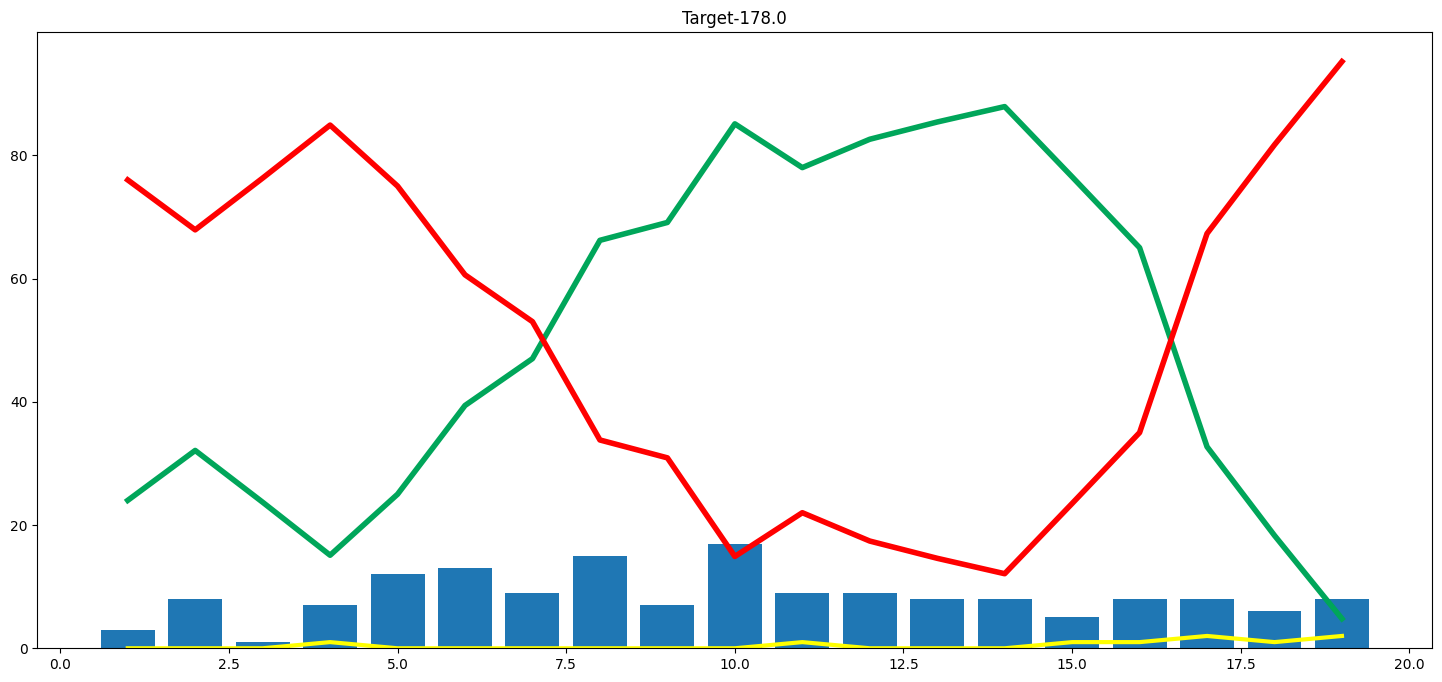

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala'],
      dtype=object)

In [ ]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [ ]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
5812,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,123.0,55,5,178.0,5.169231,13.418182
4369,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,15.0,5,3,214.0,10.434783,18.000000
5288,Kings XI Punjab,Sunrisers Hyderabad,Hyderabad,146.0,106,10,164.0,8.142857,8.264151
4148,Mumbai Indians,Chennai Super Kings,Chennai,179.0,97,8,208.0,7.826087,11.072165
842,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata,126.0,76,9,172.0,6.409091,9.947368
...,...,...,...,...,...,...,...,...,...
11411,Rajasthan Royals,Delhi Capitals,Centurion,94.0,70,7,143.0,6.000000,8.057143
2785,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,95.0,68,9,167.0,8.423077,8.382353
26191,Sunrisers Hyderabad,Kolkata Knight Riders,Hyderabad,145.0,99,10,169.0,7.142857,8.787879
6494,Chennai Super Kings,Delhi Capitals,Delhi,47.0,32,6,187.0,9.613636,8.812500


In [63]:
y_pred = pipe.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred)

0.8432441942294159

In [66]:
y_pred = pipe.predict_proba(X_test)
# accuracy_score(y_test,y_pred)
print("accuracy_score:",y_pred)

accuracy_score: [[0.0387033  0.9612967 ]
 [0.48348454 0.51651546]
 [0.090027   0.909973  ]
 ...
 [0.02119675 0.97880325]
 [0.18058125 0.81941875]
 [0.11658033 0.88341967]]
